<h1><b>Table of Contents</b></h1>

# Data Exploration

The Pima Indian diabetes (PID) dataset is collected from the UCI Machine Learning Repository, which is originated from the national institute of diabetes and digestive and kidney diseases (NIDDK). In the PID dataset, all the patients are female, and at least 21 years old. The data set contains information about 768 patients and their corresponding nine unique attributes.

<h4> a. Import library </h4>

In [1]:
# import necessary packages
import keras
import os
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier #
import math
from mlxtend.preprocessing import minmax_scaling

import pandas as pd
import numpy as np
import datetime

# Plots
import seaborn as sns
sns.set()
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

import sys

from collections import Counter
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours

In [2]:
from preprocessing_diabetes import outliers_remove

<h4>b. Describe the data</h4>

The dataset is read into a dataframe.

In [3]:
data_folder = '../dataset/diabetes'
file_path =  os.path.join(data_folder, "diabetes.csv")

df=pd.read_csv(file_path)

Now, we will understand the format of data

In [4]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [5]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The columns are [‘Pregnancies’, ‘Glucose’, ‘BloodPressure’, ‘SkinThickness’, ‘Insulin’, ‘BMI’, ‘DiabetesPedigreeFunction’, ‘Age’, ‘Outcome’]


In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [9]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Features in the dataset

In [10]:
features = [i for i in df.columns]

In [11]:
from visualization_diabetes import corr_matrix, box_plot, distribution_plot, distribution_features, pair_plot, violin_plot, missing_plot, missing_percentage, outliers_plot, feature_plot

Correlation matrix 

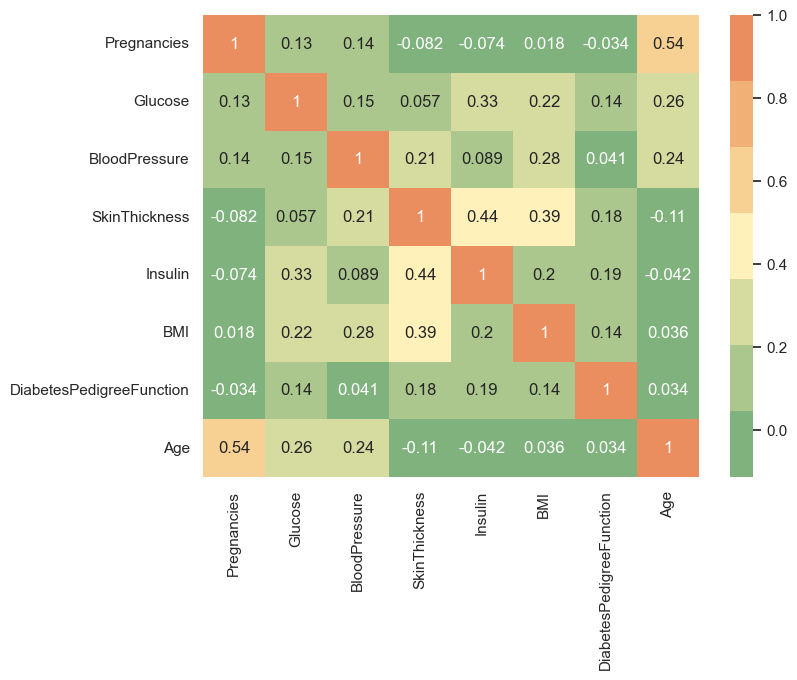

In [12]:
corr_matrix(df)

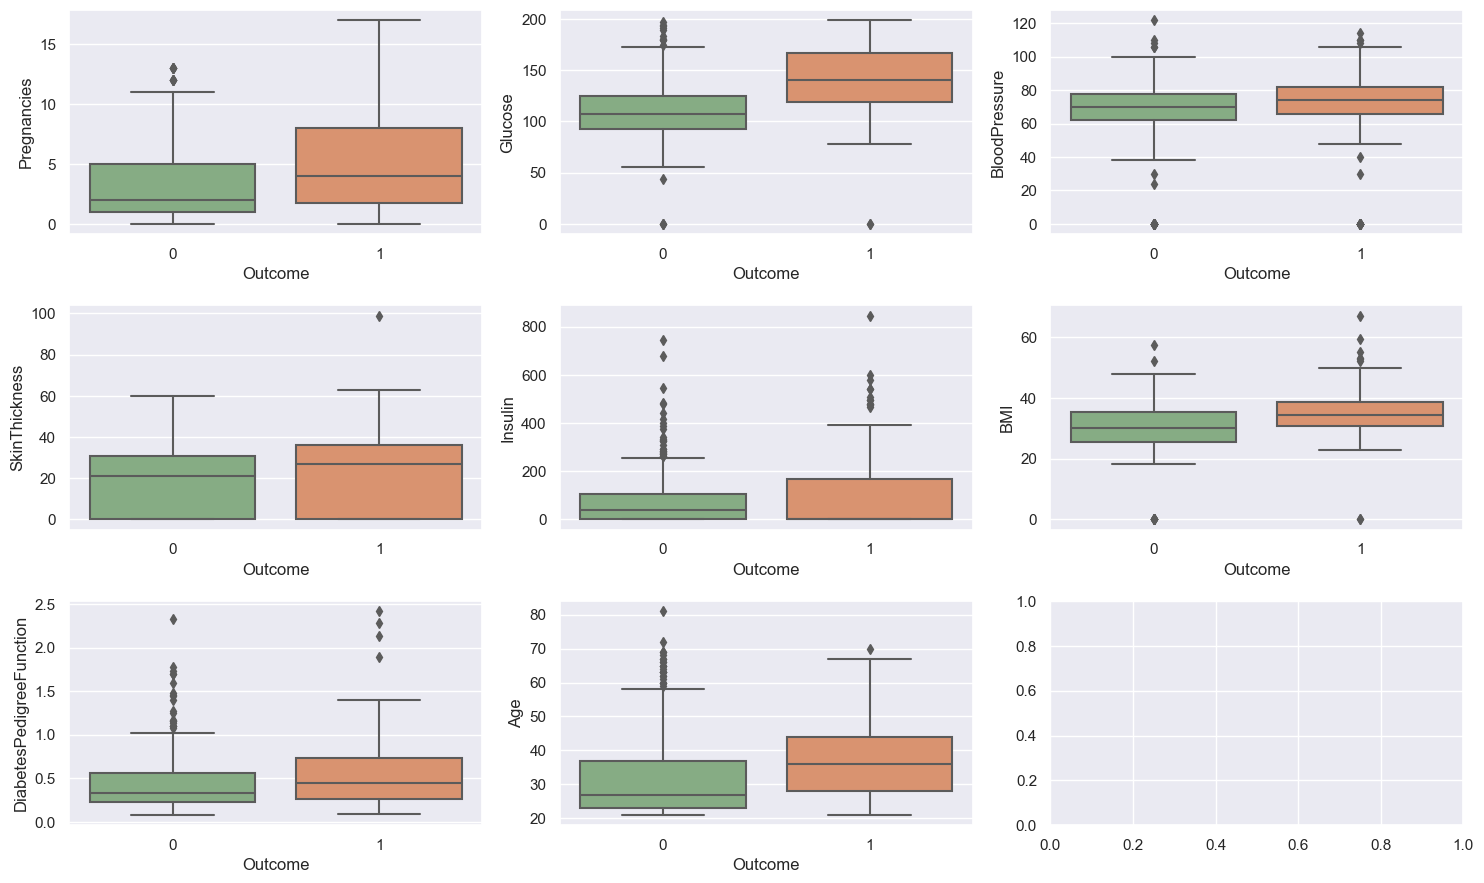

In [13]:
box_plot(df)

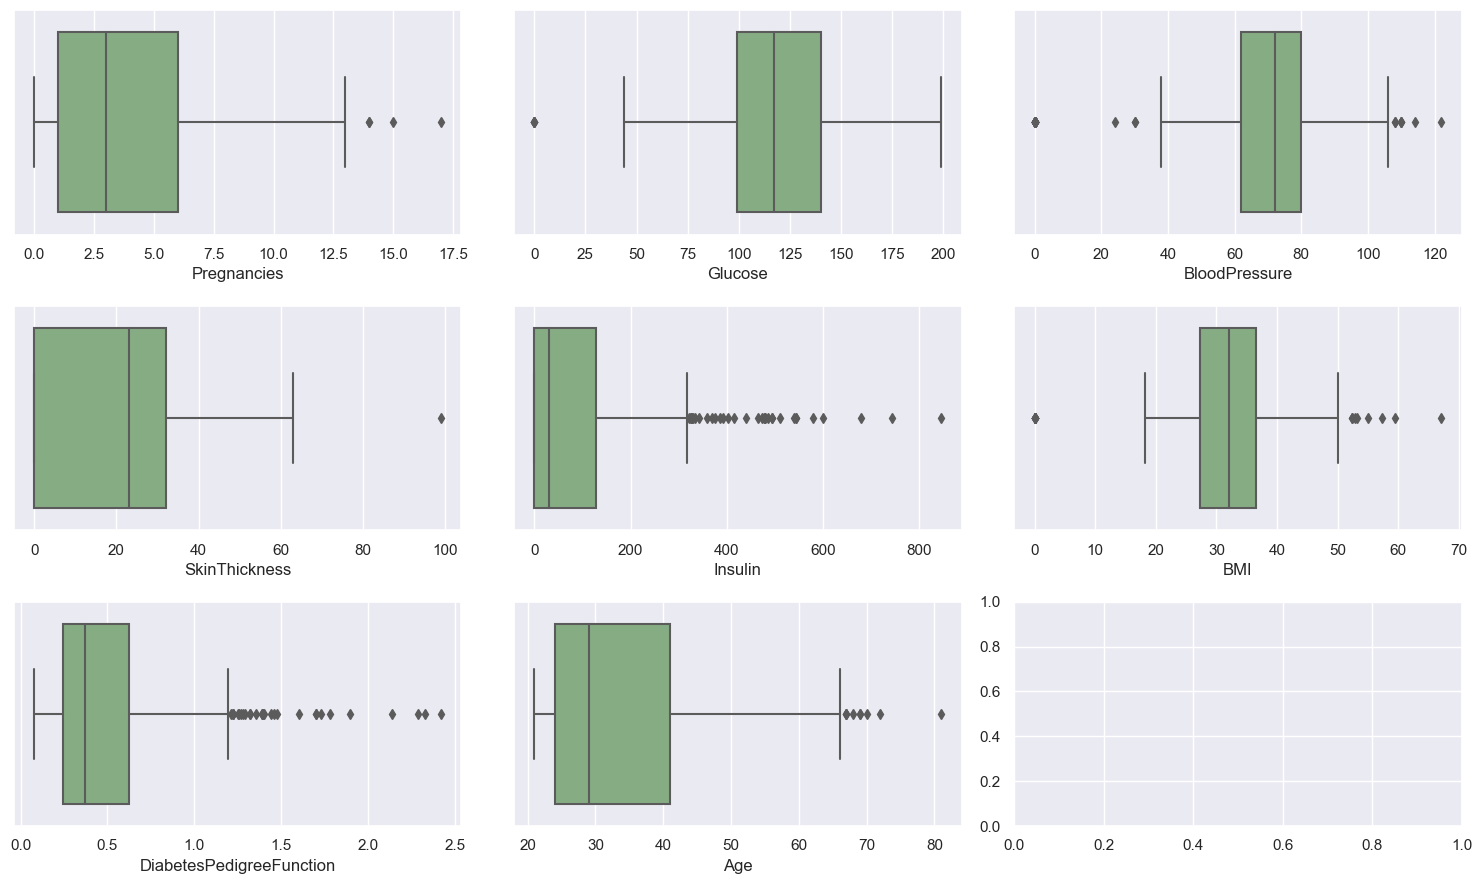

In [14]:
feature_plot(df)

<h3><b>2. Visualization </b></h3>

Samples of diabetic people:  268
Samples of healthy people:  500


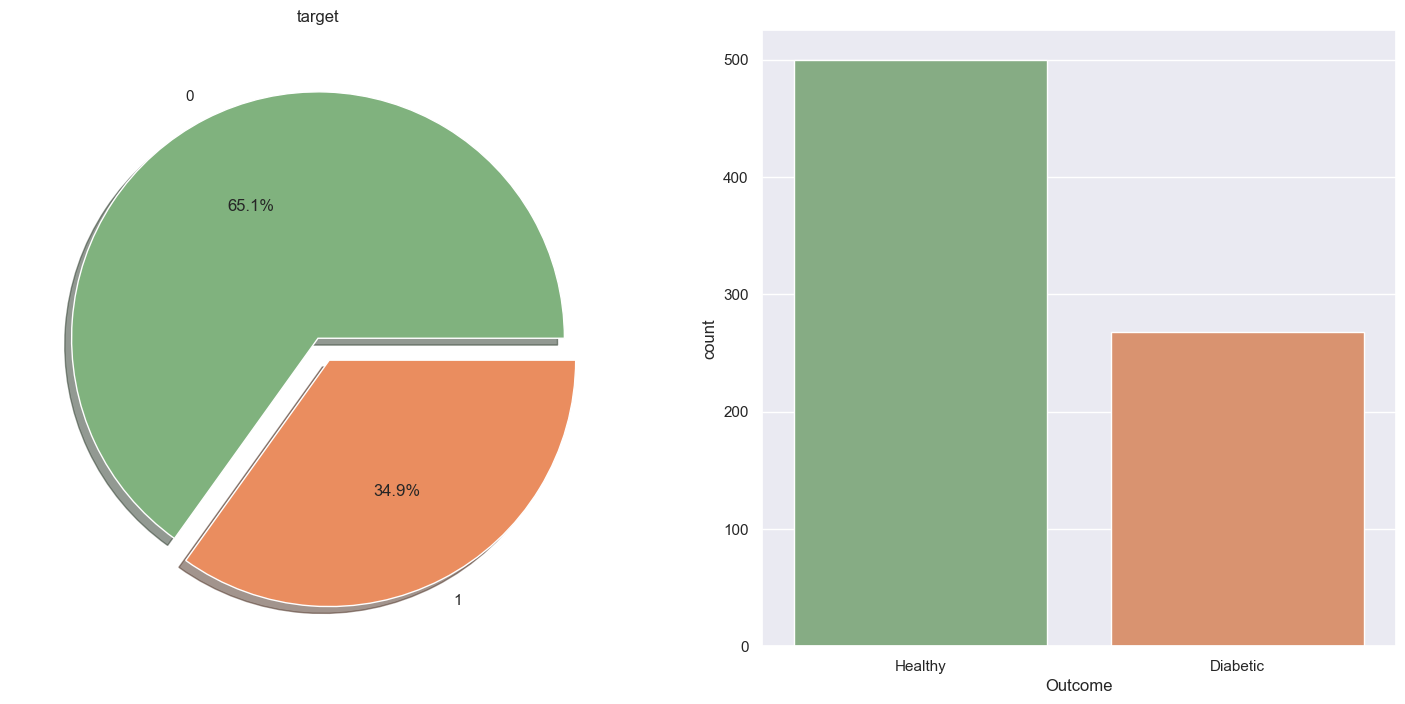

In [15]:
distribution_plot(df)

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

<h3><b>3. Distribution of features </b></h3>

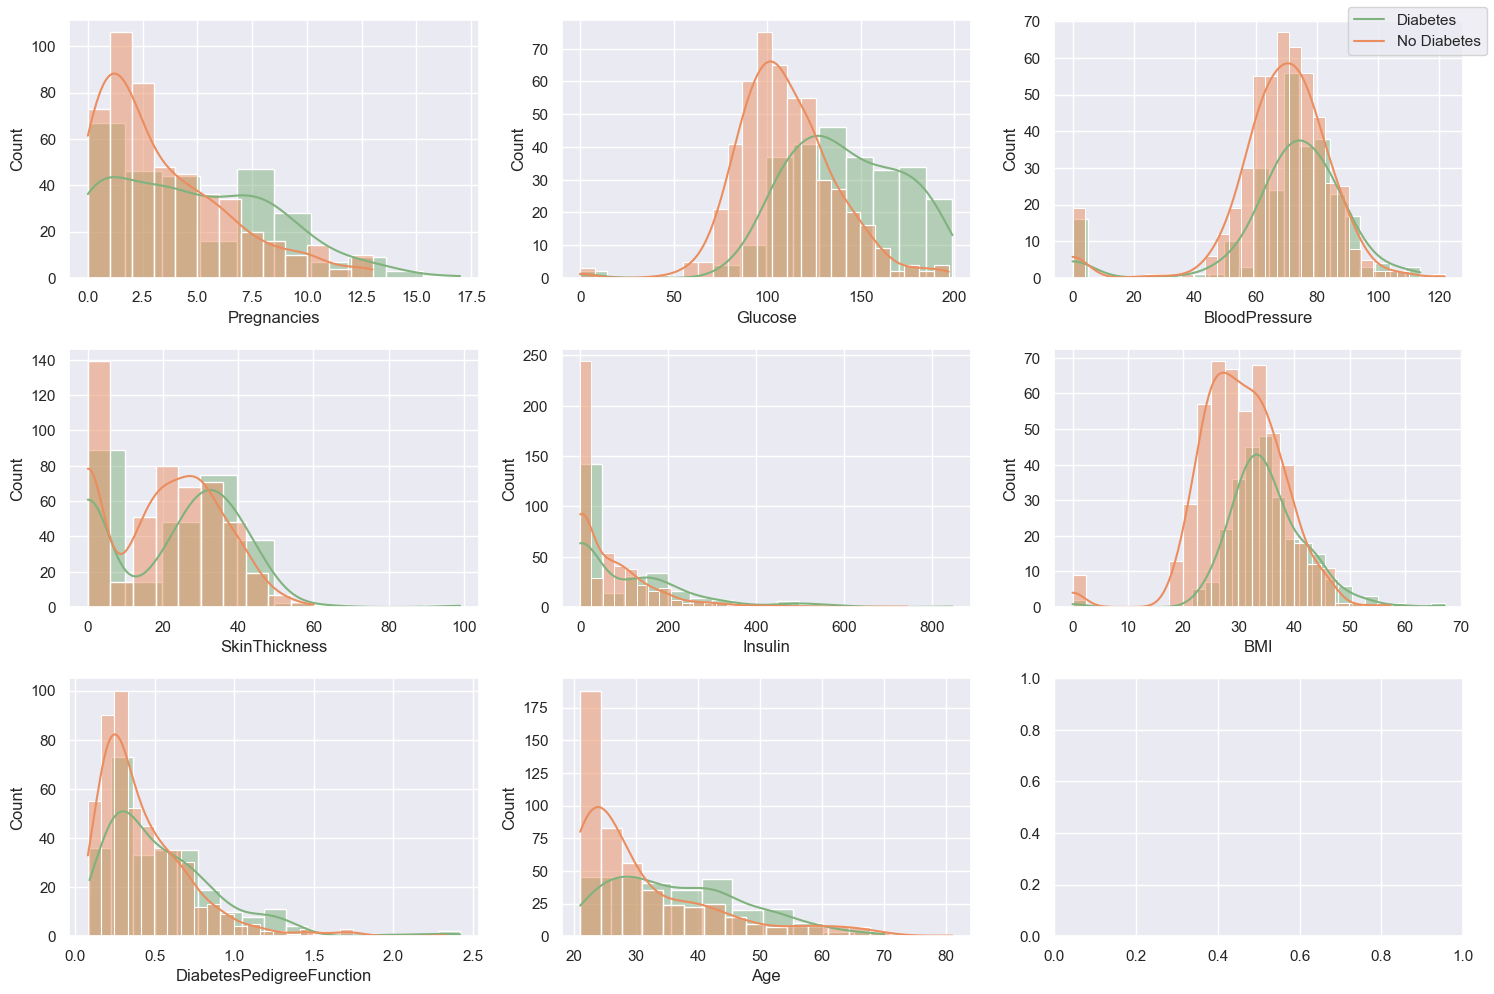

In [16]:
distribution_features(df)

<b> Pair Plot </b>

C:\Users\nphan\AppData\Local\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



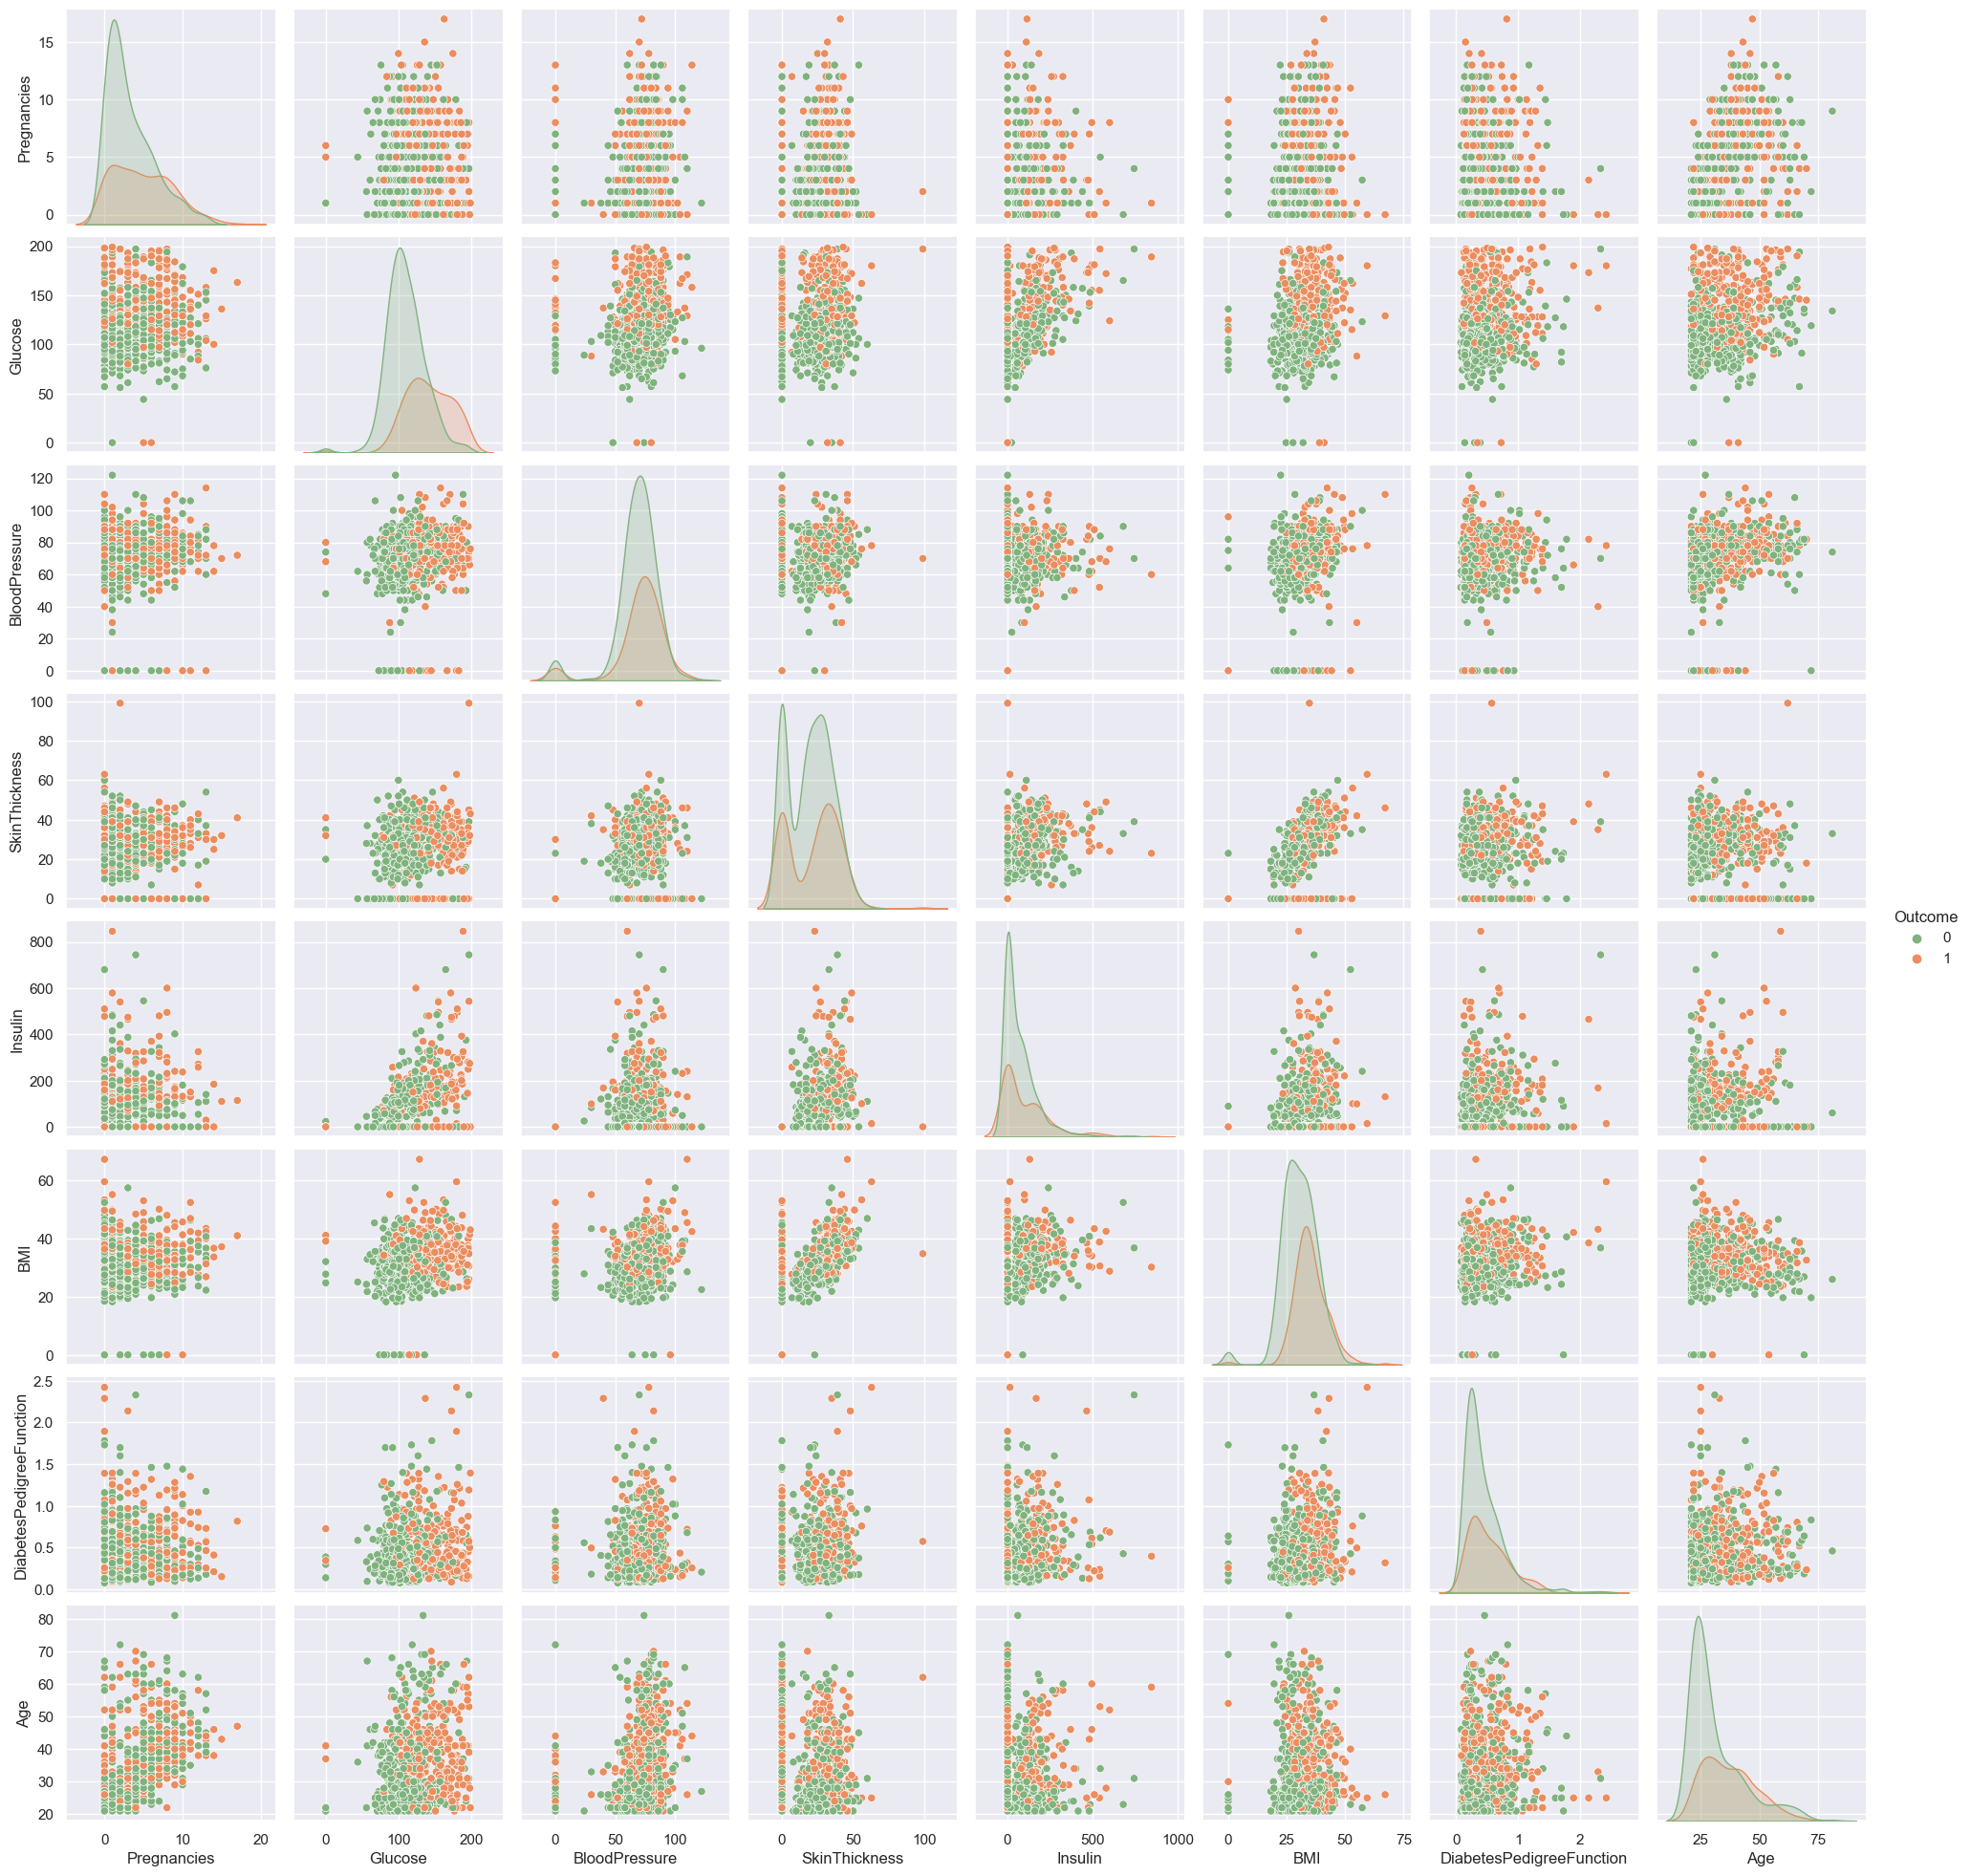

In [17]:
pair_plot(df)

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

<b> Violin Plot </b>

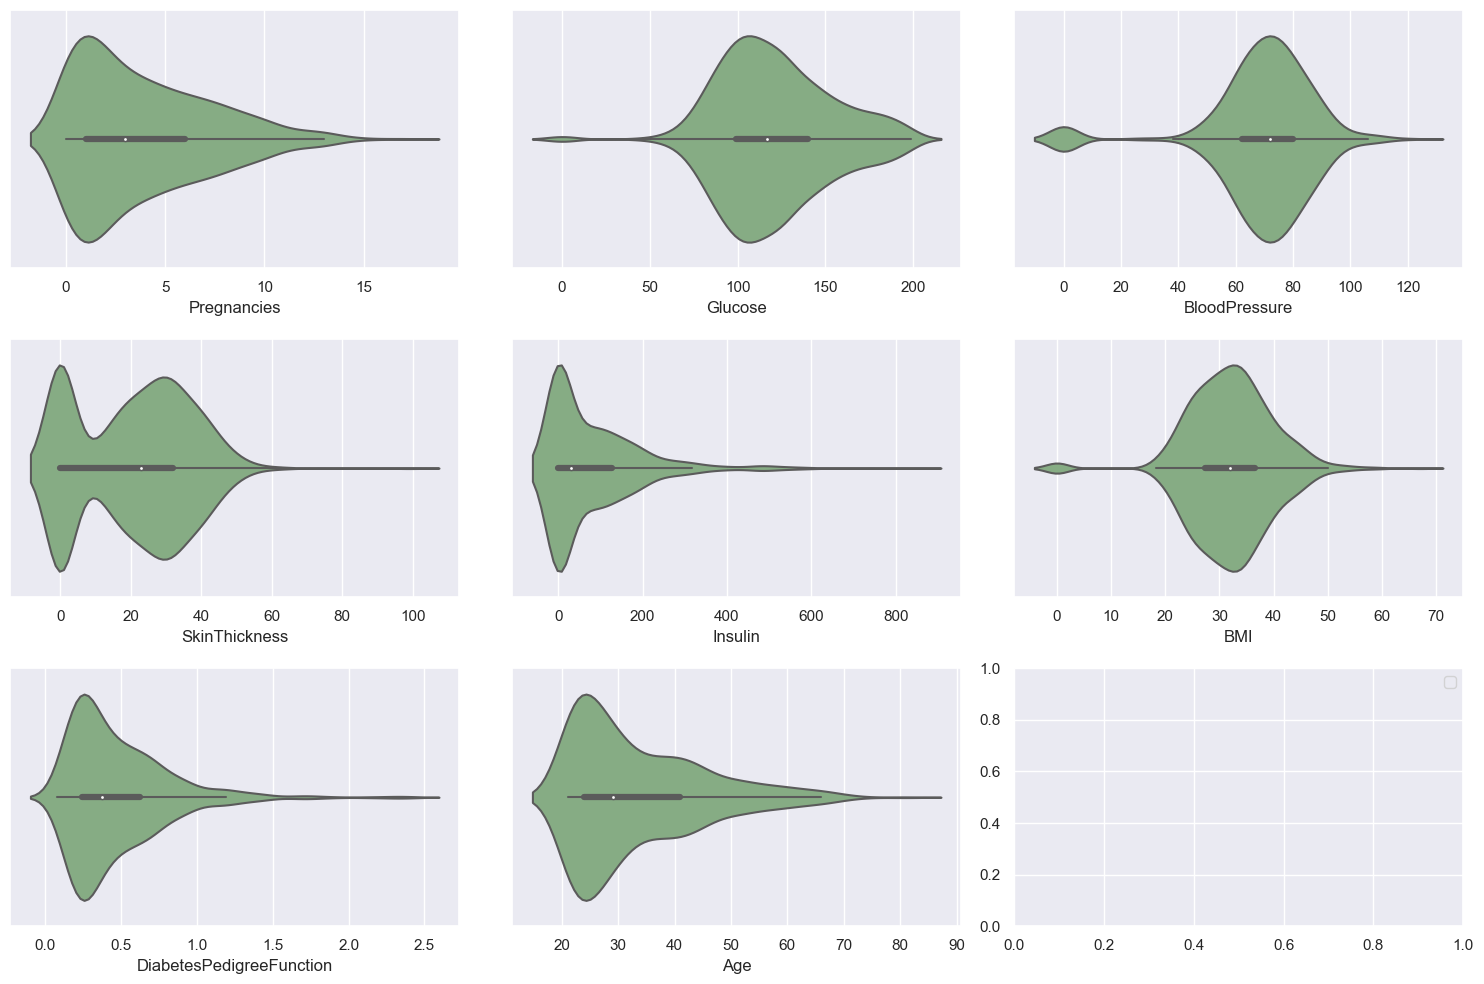

In [18]:
violin_plot(df)

<h3><b>4. Data Cleaning - Imputation techniques </b></h3>

Check for missing values

In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

All the columns have count = 768 which suggests there are no missing values. 

In [20]:
df_missing = df.copy()
df_missing[['Glucose','Insulin','BMI']] = df_missing[['Glucose','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_missing.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<div class="alert alert-block alert-info"> 📌  Reviewing the data, we can say that there are no missing values, however that is because the high proportion of 0 values in these variables are being considered a valid values for skin thickness and insulin. To reiterate the values, skin thickness has 227 records with a 0 value (30% to total rows) and insulin has 374 records with a zero value (49% of total rows)

Buy that is technically someone can't have a skin thickness of 0, nor a 2-hour serum insulin level of 0. They would most likely be dead in these situations. So I think it would be a fair conclusion to say that these 0 values should be considered missing data. </div>

We can see which variable in the data set has the invalid zero value(s)

In [21]:
df_missing.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35      NaN  33.6   
1            1     85.0             66             29      NaN  26.6   
2            8    183.0             64              0      NaN  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Using the missingno Python library to Identify and Visualise Missing Data

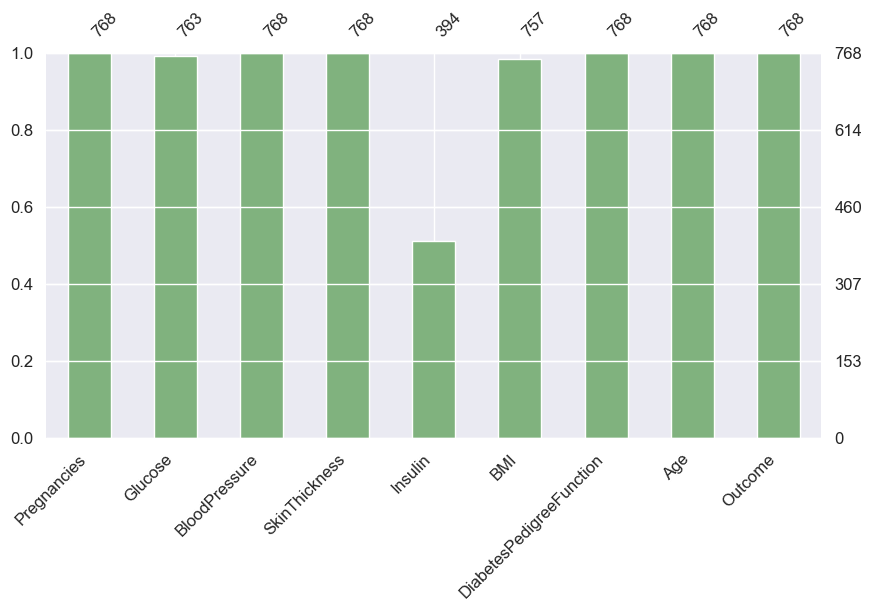

In [22]:
missing_plot(df_missing)

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

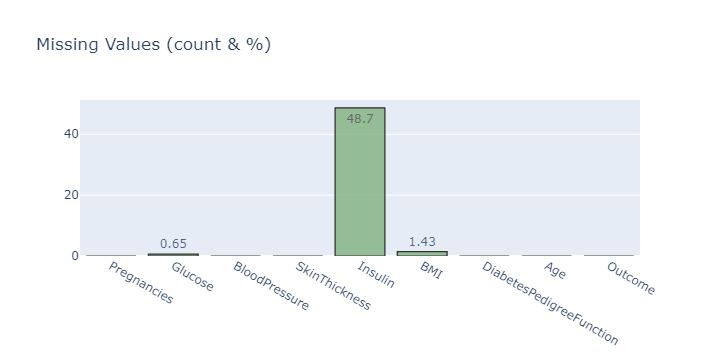

In [23]:
missing_percentage(df_missing)

To fill these Nan values the data distribution needs to be understood against the target. So we use the correlation matrix.

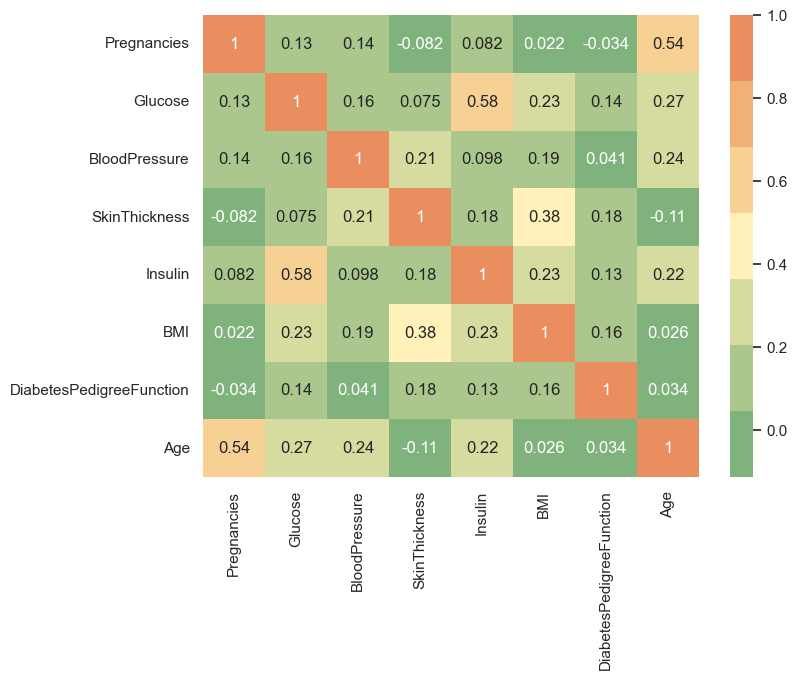

In [24]:
corr_matrix(df_missing)

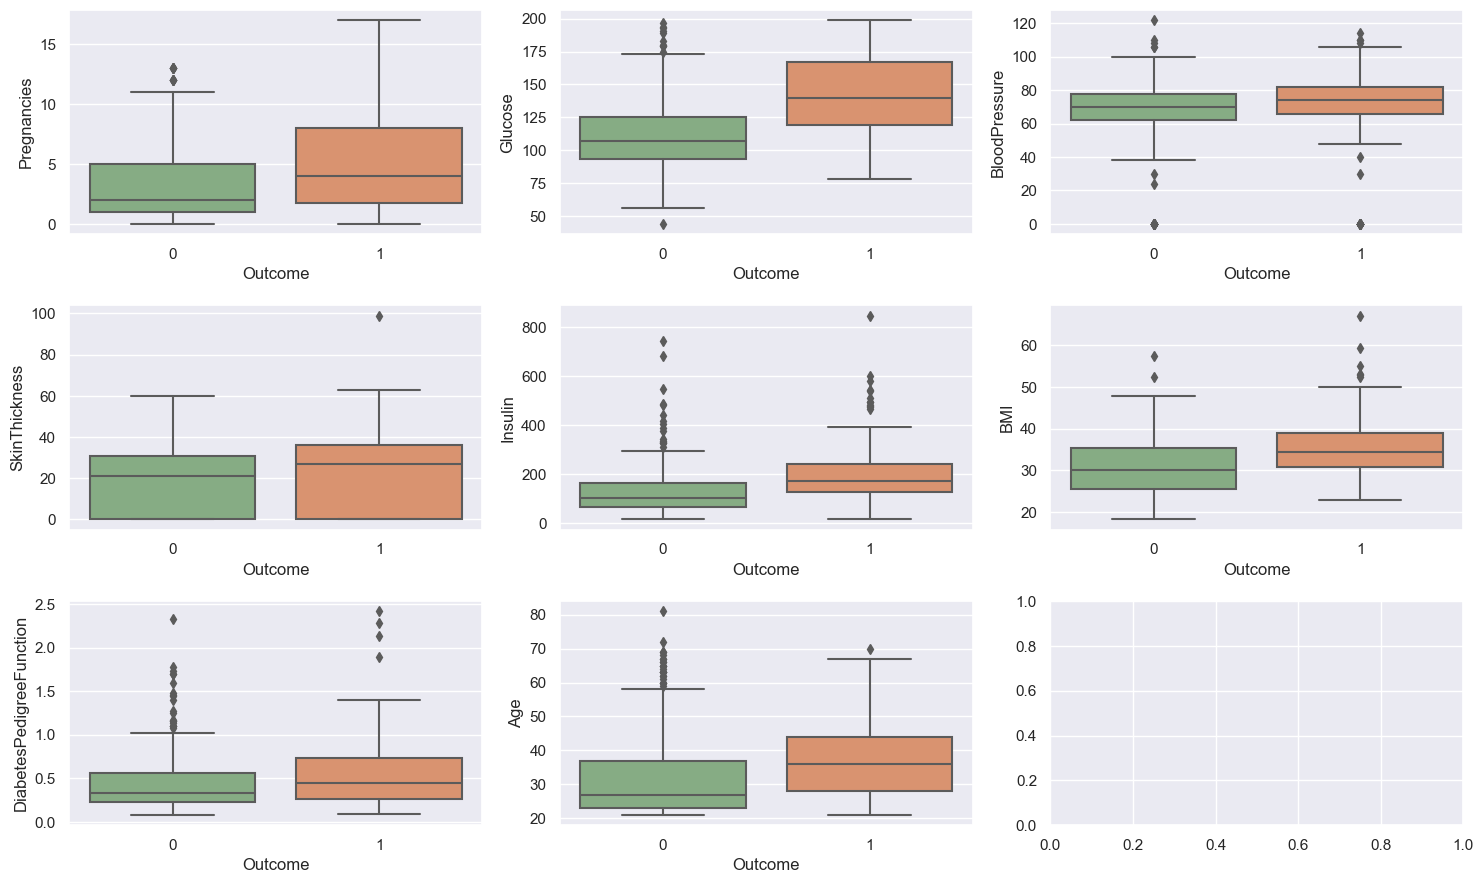

In [25]:
box_plot(df_missing)

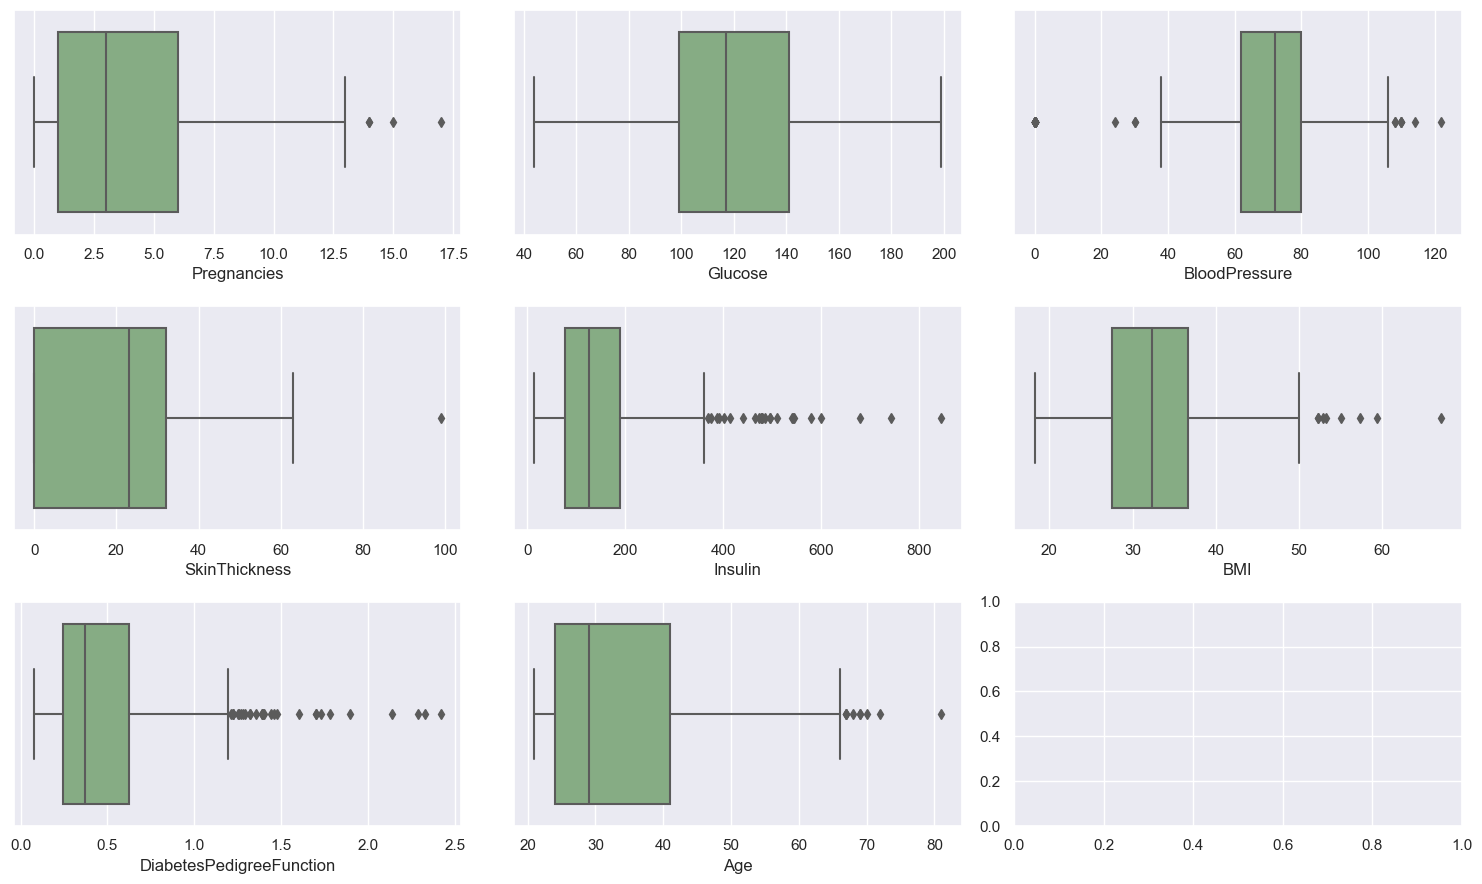

In [26]:
feature_plot(df_missing)

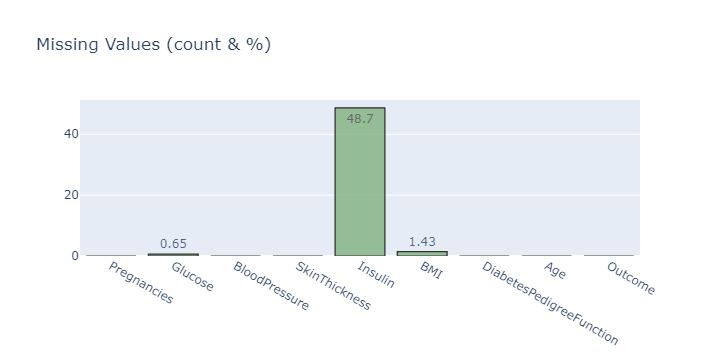

In [27]:
missing_percentage(df_missing)

In [28]:
col_with_null = ['Glucose','Insulin', 'BMI']

In [29]:
from preprocessing_diabetes import median_target, replace_median

In [30]:
replace_median(df_missing, col_with_null)

Outcome  Glucose
0        0    107.0
1        1    140.0

Outcome  Insulin
0        0    102.5
1        1    169.5

Outcome   BMI
0        0  30.1
1        1  34.3

In [31]:
df_missing.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35    169.5  33.6   
1            1     85.0             66             29    102.5  26.6   
2            8    183.0             64              0    169.5  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [32]:
print(df_missing.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


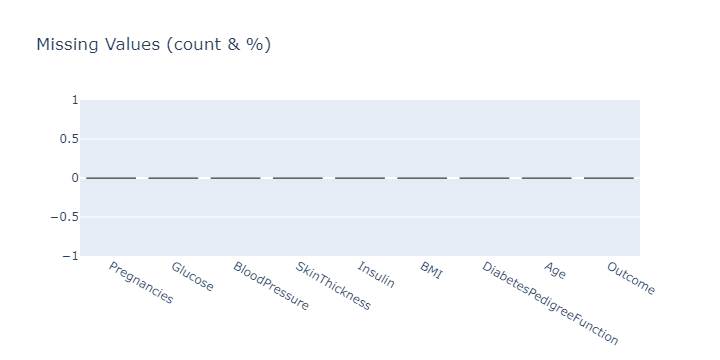

In [33]:
missing_percentage(df_missing)

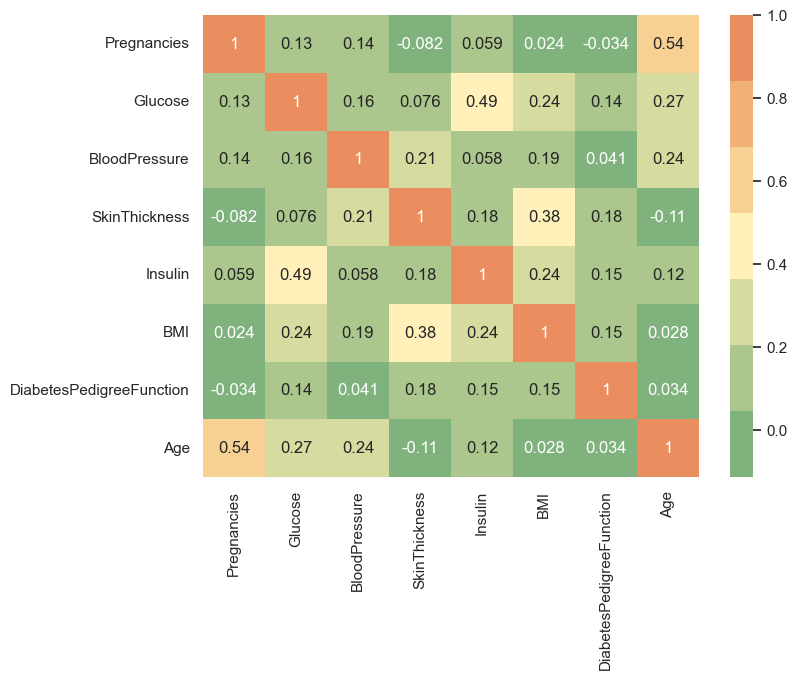

In [34]:
corr_matrix(df_missing)

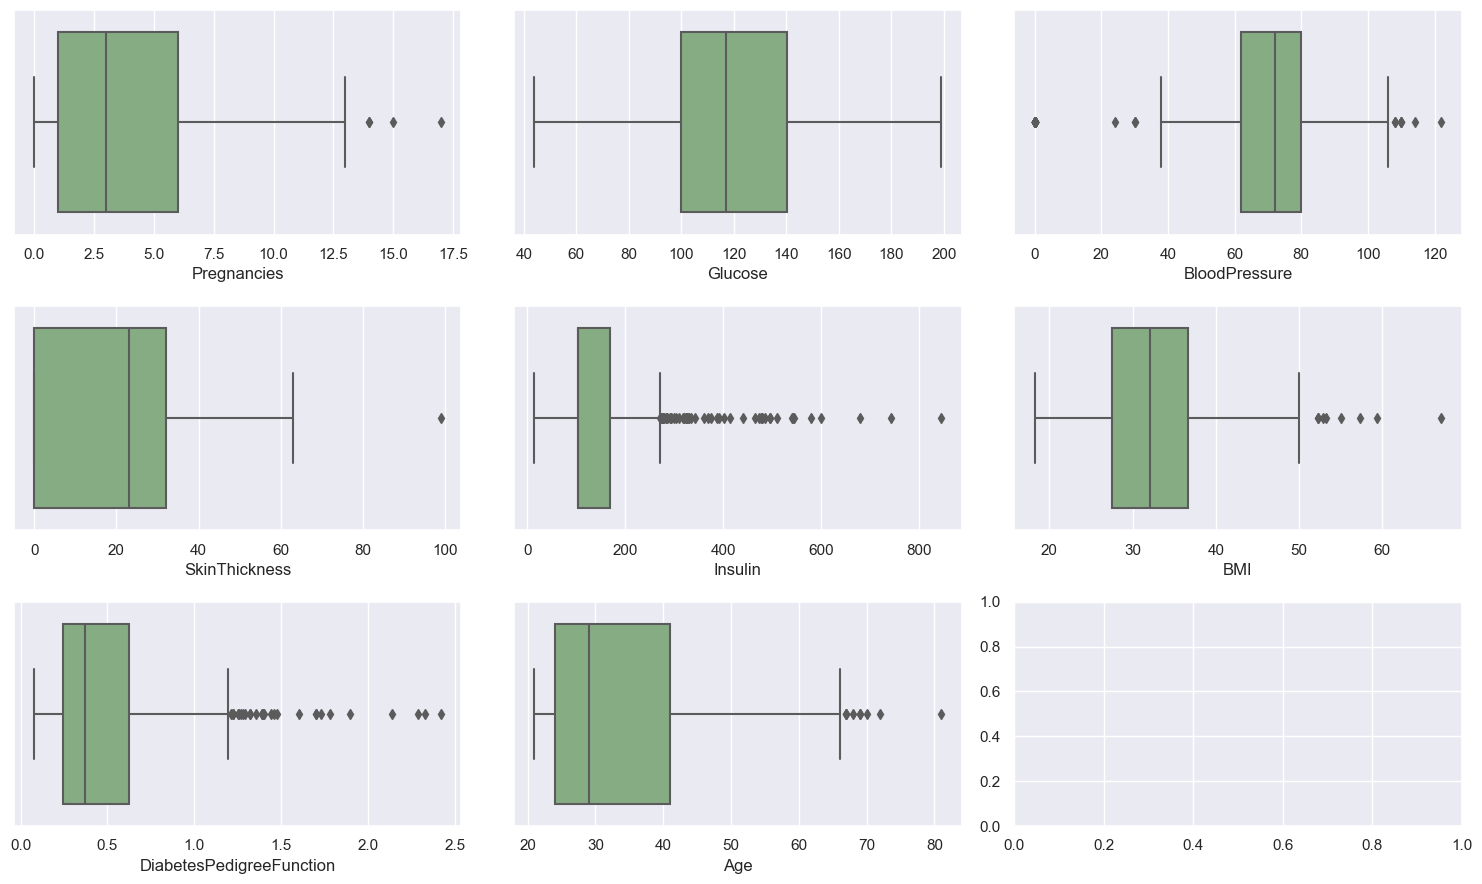

In [35]:
feature_plot(df_missing)

<h3><b>5. Handling Outliers </b></h3>

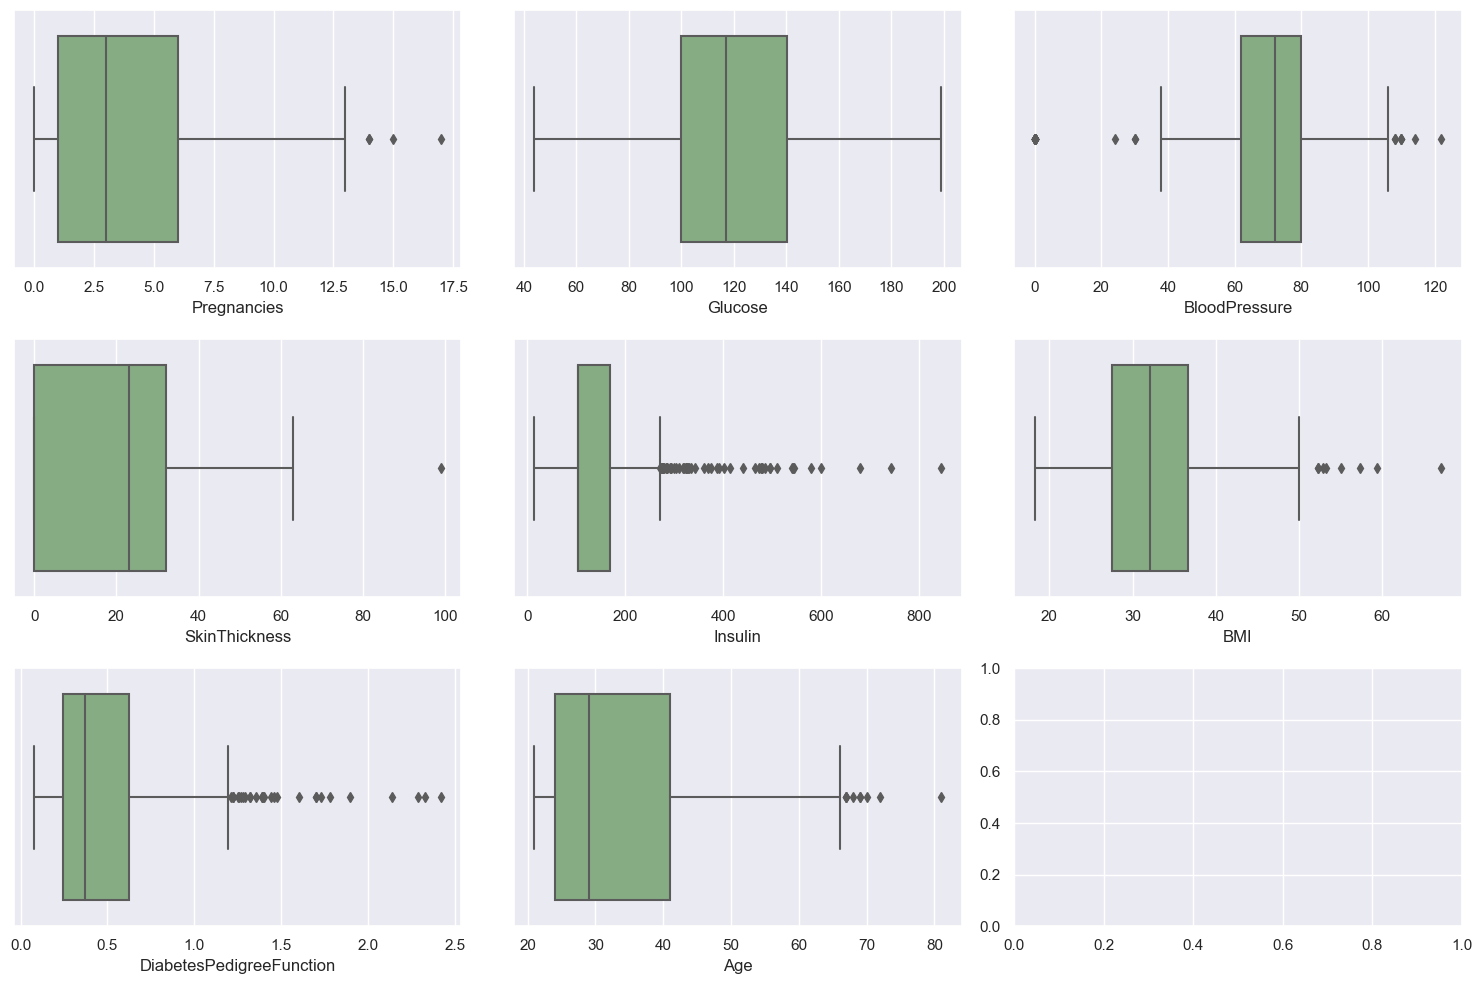

In [36]:
outliers_plot(df_missing)

In [37]:
# duplicate original dataframe
df_outlier = df_missing.copy()

In [38]:
df_outlier = outliers_remove(df_missing)

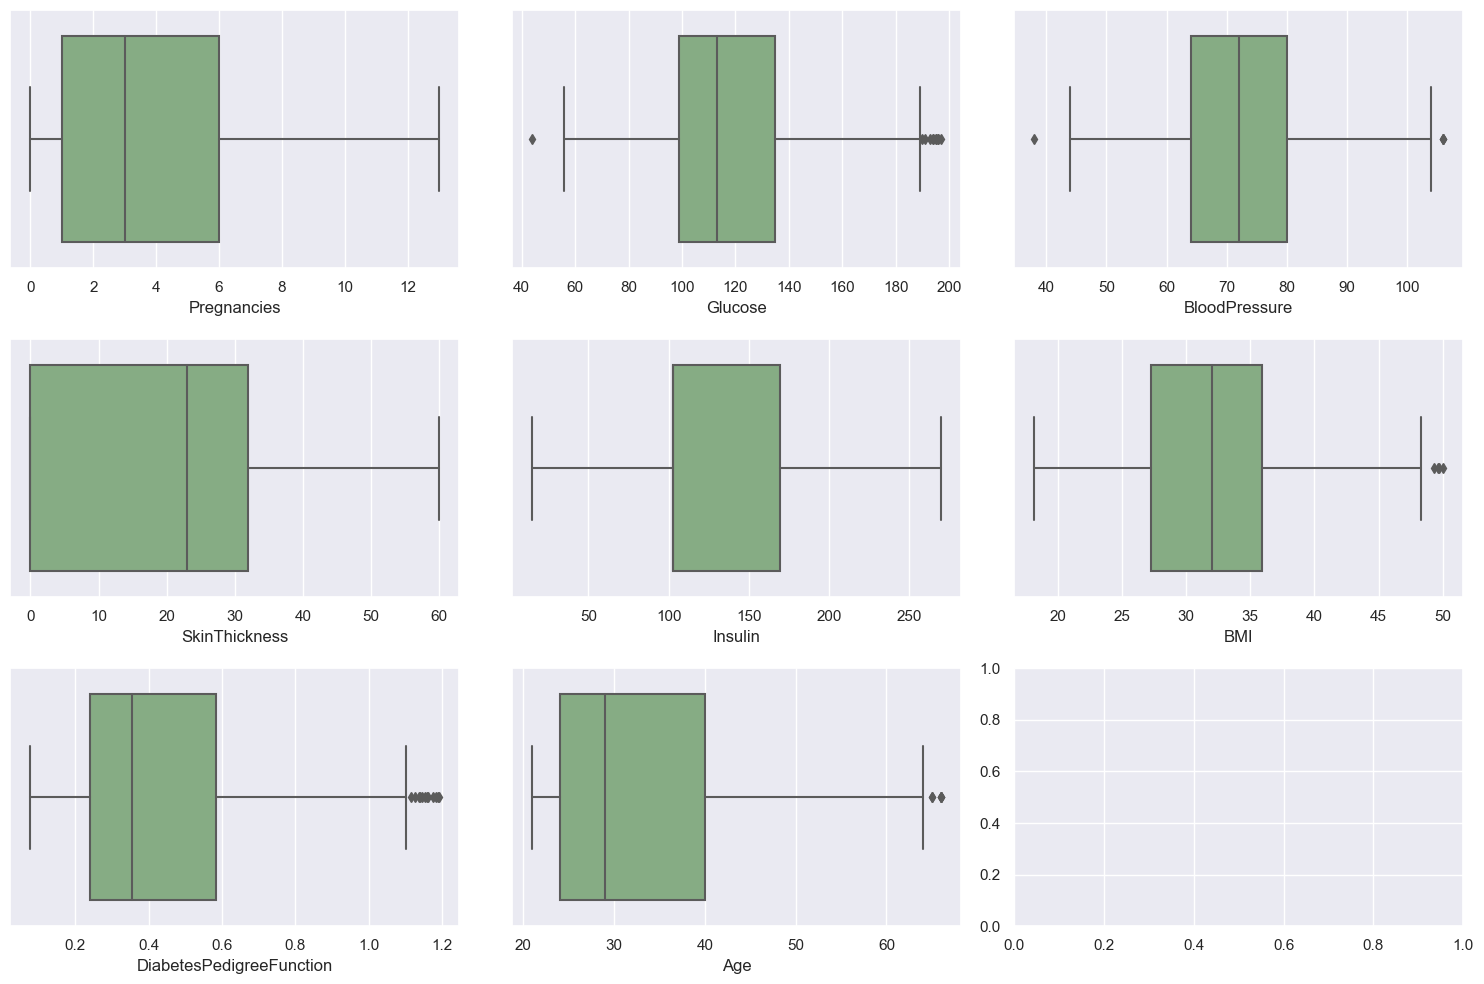

In [39]:
outliers_plot(df_outlier)

In [40]:
print('Original df.shape: {},-- New df.shape: {}, -- {} rows removed -- which is {}% of our data'.format(df.shape[0],df_outlier.shape[0],
                                                              df.shape[0]-df_outlier.shape[0],
                                                        (df.shape[0]-df_outlier.shape[0])/df.shape[0]*100))

Original df.shape: 768,-- New df.shape: 631, -- 137 rows removed -- which is 17.838541666666664% of our data


In [41]:
df_outlier.value_counts('Outcome')

Outcome
0    436
1    195
dtype: int64

<h3><b>6. Split data set to train set and test set </b></h3>

In [42]:
from preprocessing_diabetes import split_data
from visualization_diabetes import split_plot

In [43]:
# Call train_test_split with the `stratify` parameter
# X_train, X_test, y_train, y_test = split_data(df_outlier)
X = df_outlier.drop(columns=['Outcome'])
y = df_outlier['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [44]:
y_train_vals = y_train.value_counts()
y_test_vals = y_test.value_counts()

In [45]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {y_train_vals[0]}")
print(f" + Defaulters (y=1):\t {y_train_vals[1]}")

print("Test set:")
print(f" + Non-defaulters (y=0): {y_test_vals[0]}")
print(f" + Defaulters (y=1):\t {y_test_vals[1]}")

(504, 8)
(127, 8)
Training set:
 + Non-defaulters (y=0): 348
 + Defaulters (y=1):	 156
Test set:
 + Non-defaulters (y=0): 88
 + Defaulters (y=1):	 39


<b> Using stratify for target </b>

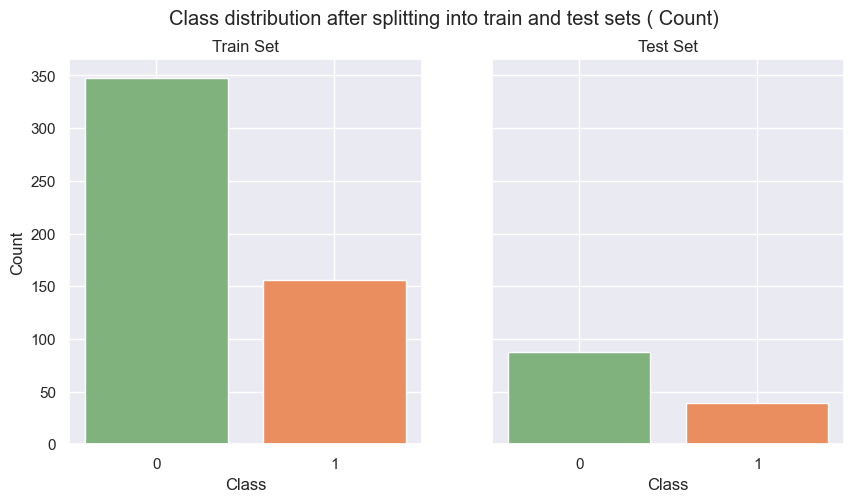

In [46]:
split_plot( y_train,y_test)

This change ensures that the train and test sets follow the same distribution as our original dataset.

<h3><b>7. Feature selection </b></h3>

In [47]:
def plot_color_label_before(data, target):
    well_name = "RANDOM"
    highlight_colour = '#d95f02'
    non_highlight_colour = '#768493'

    data['colours'] = data['name'].apply(lambda x: highlight_colour if x == well_name else non_highlight_colour)


    data = data.sort_values(by='score')

    fig, ax = plt.subplots(figsize=(30,15))

    bars = plt.barh(data['name'], data['score'], height=0.7, color=data['colours'])

    ax.spines[['right', 'top', 'bottom']].set_visible(False) 
    ax.xaxis.set_visible(False)
    ax.yaxis.set_tick_params(labelsize=10)

    ax.bar_label(bars, padding=-45, color='white', 
                 fontsize=8, label_type='edge', fmt='%.3f%%',
                fontweight='bold')
    ax.set_title('Feature Importance', fontsize=16,
                  fontweight='bold', pad=20)
    plt.savefig("../img/randomfeature.png")
    plt.show()
    

Duplicate train set and test set for feature selection

In [48]:
#for Pearson correlation
X_train_RF = X_train.copy()
X_test_RF = X_test.copy()

In [49]:
print(np.shape(X_train_RF))

(504, 8)


<h4> Built-in Scikit-learn Method With A Random Feature </h4>

In [50]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train.values.ravel())

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=False, inplace=True)

In [51]:
global_importances_random

Insulin                     0.416377
Glucose                     0.156721
BMI                         0.078428
Age                         0.073230
DiabetesPedigreeFunction    0.069407
SkinThickness               0.066239
RANDOM                      0.048879
Pregnancies                 0.047582
BloodPressure               0.043137
dtype: float64

In [52]:
df_score = pd.DataFrame({'name':global_importances_random.index, 'score':global_importances_random.values})

In [53]:
df_score.to_markdown

<bound method DataFrame.to_markdown of                        name     score
0                   Insulin  0.416377
1                   Glucose  0.156721
2                       BMI  0.078428
3                       Age  0.073230
4  DiabetesPedigreeFunction  0.069407
5             SkinThickness  0.066239
6                    RANDOM  0.048879
7               Pregnancies  0.047582
8             BloodPressure  0.043137>

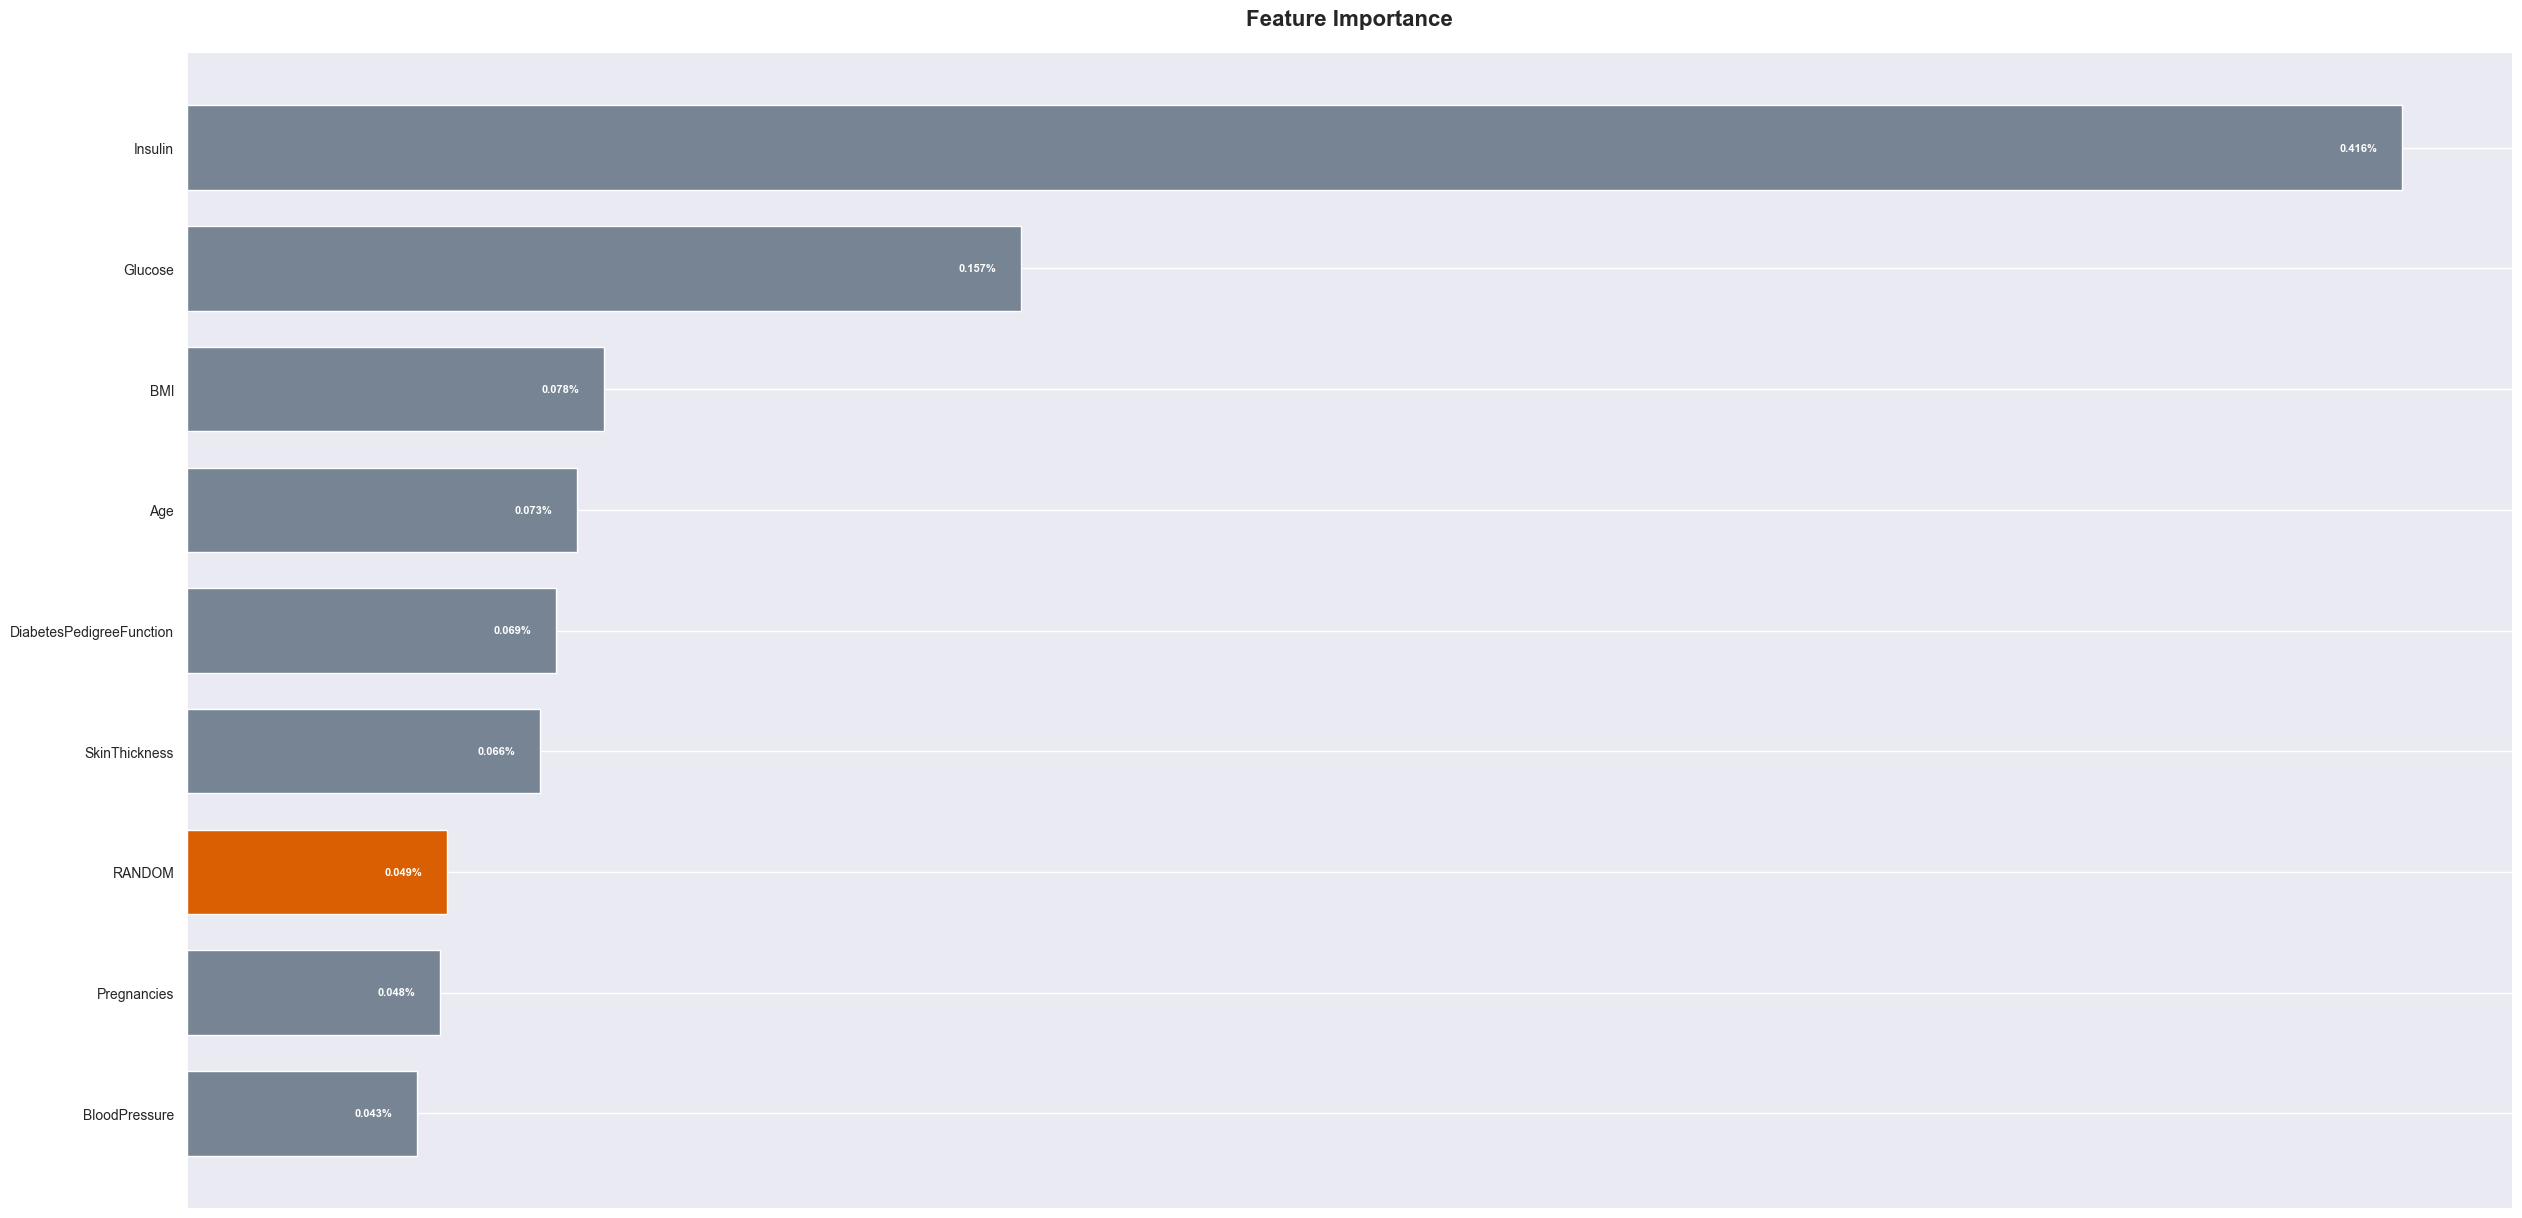

In [54]:
plot_color_label_before(df_score, 'RANDOM')

In [55]:
df_score.index[df_score['name']=='RANDOM'].tolist()

[6]

<h4> Permutation Feature Importance ((Better, but slower) </h4>

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Clean data
sorted_idx = result.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=result.importances[sorted_idx].T, columns=X_test.columns[sorted_idx])

# perm_importances = result.importances_mean
# perm_std = result.importances_std
# sorted_idx = perm_importances.argsort()
# feature_names = X_test.columns

# df_score2 = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

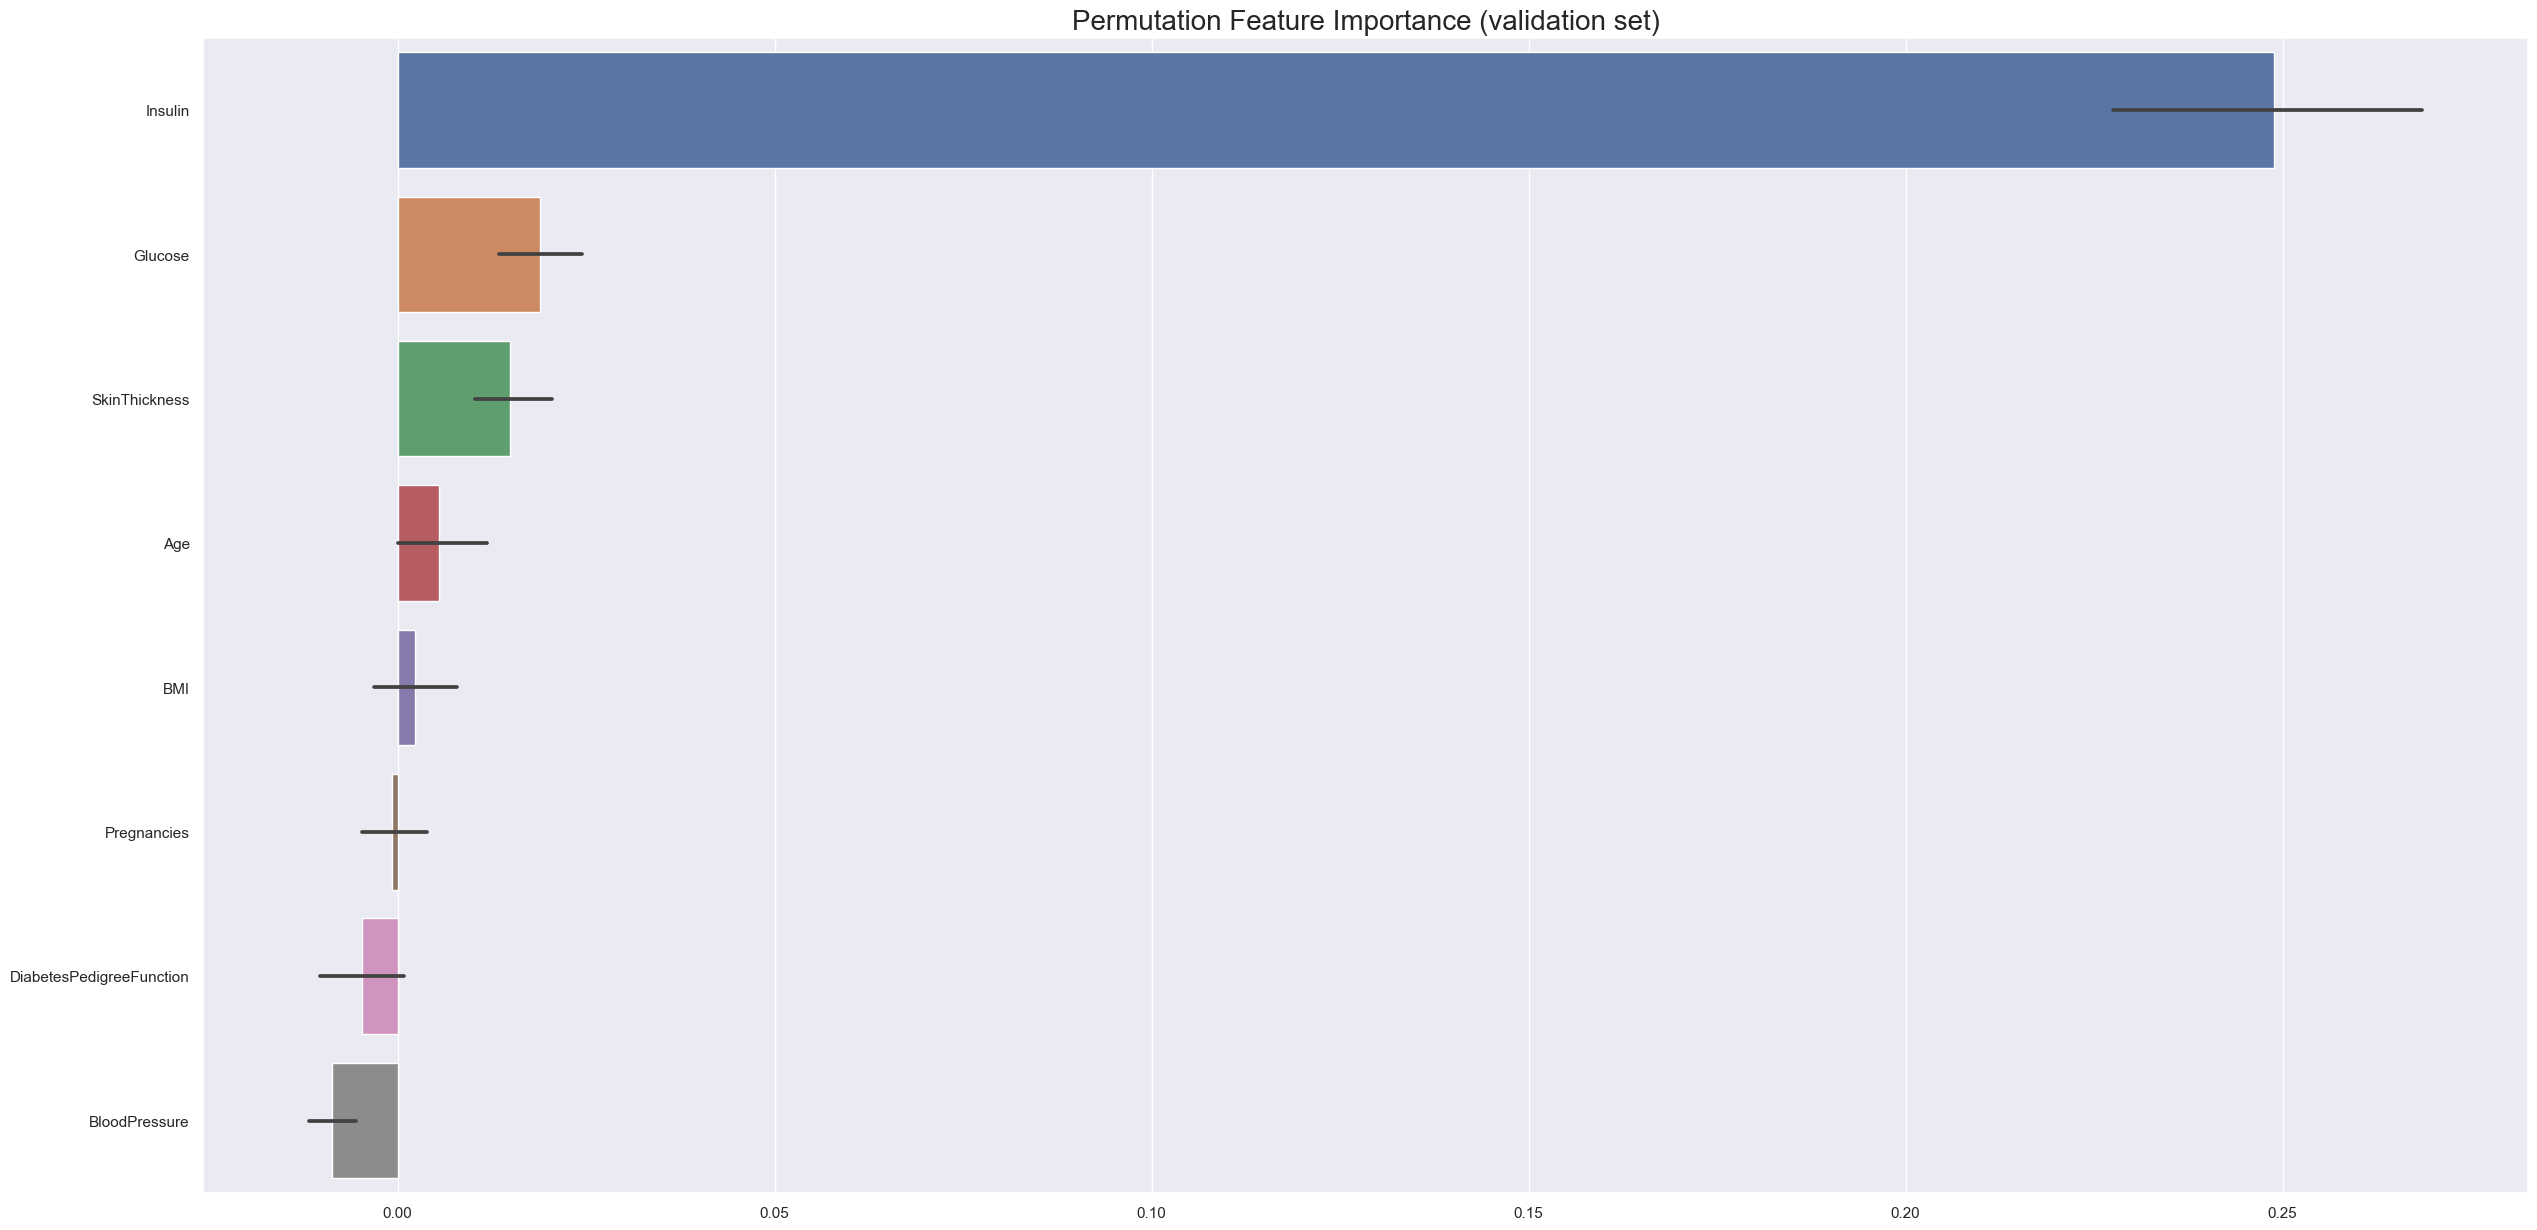

In [57]:
# Plot (This can be barplot, boxplot, violinplot,...)
plt.figure(figsize=(30,15))
sns.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (validation set)",  fontsize=20)
plt.savefig("../img/permutationfeature.png")

<h4>Random Forest Feature Importance With SHAP </h4>

In [58]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [59]:
# load JS visualization code to notebook
shap.initjs()

In [60]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.68890873 0.31109127]


In [61]:
# Shap Values for class =0 that is  class
print("Shap Values for '0' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for '0' class


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.016118 -0.027557      -0.011178       0.010393  0.225473 -0.012294   
1     0.009759  0.101816      -0.000127      -0.017309  0.176299 -0.016504   
2     0.019971  0.086879      -0.000820       0.000342  0.210401 -0.013273   
3     0.014582  0.006183       0.007767      -0.005684  0.168601  0.061640   
4    -0.073325 -0.019498       0.030897      -0.035790 -0.375536 -0.044722   

   DiabetesPedigreeFunction       Age  
0                 -0.008486  0.038623  
1                  0.042681 -0.015524  
2                 -0.003390  0.010982  
3                  0.020963  0.027038  
4                 -0.053869 -0.047066

In [62]:
# Shap Values for class =1 that is  class
print("Shap Values for '1' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for '1' class


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.016118  0.027557       0.011178      -0.010393 -0.225473  0.012294   
1    -0.009759 -0.101816       0.000127       0.017309 -0.176299  0.016504   
2    -0.019971 -0.086879       0.000820      -0.000342 -0.210401  0.013273   
3    -0.014582 -0.006183      -0.007767       0.005684 -0.168601 -0.061640   
4     0.073325  0.019498      -0.030897       0.035790  0.375536  0.044722   

   DiabetesPedigreeFunction       Age  
0                  0.008486 -0.038623  
1                 -0.042681  0.015524  
2                  0.003390 -0.010982  
3                 -0.020963 -0.027038  
4                  0.053869  0.047066

In [63]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [64]:
#Force Plot for a single observation for a single class 3
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

In [65]:
X_train.shape

(504, 8)

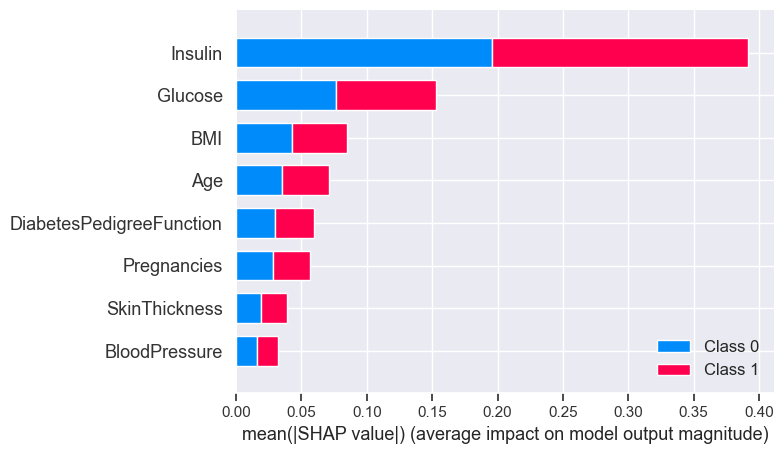

In [66]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


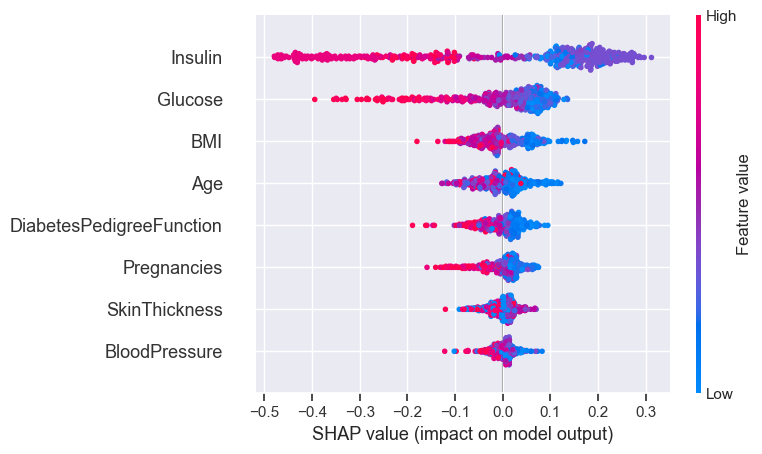

In [67]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

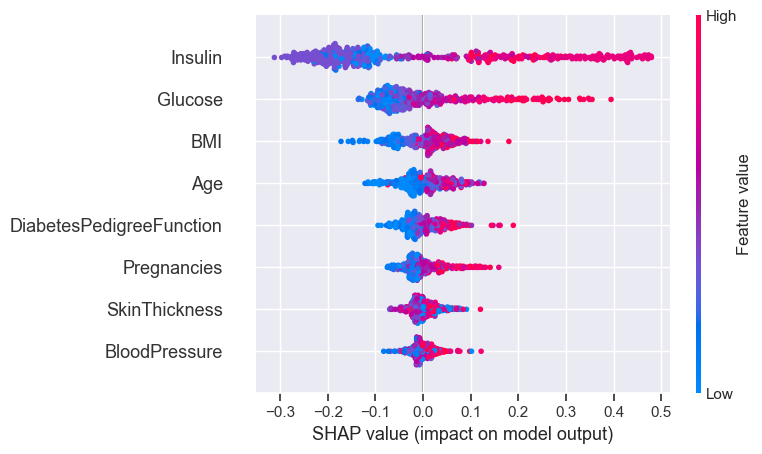

In [68]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

The code isn't too complex. But there are a few caveats.

When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".
Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.
This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

<h3><b>8. Data Scaling </b></h3>

In [69]:
sc_X = StandardScaler()

In [70]:
X_train_standardized = sc_X.fit_transform(X_train)
X_test_standardized = sc_X.transform(X_test)

## Save dataframes

In [73]:
# train set and test set
pd.DataFrame(X_train_standardized).to_csv('../train_test_set/X_train_diabetes.csv', index=False)
pd.DataFrame(X_test_standardized).to_csv('../train_test_set/X_test_diabetes.csv', index=False)
pd.DataFrame(y_train).to_csv('../train_test_set/y_train_diabetes.csv', index=False)
pd.DataFrame(y_test).to_csv('../train_test_set/y_test_diabetes.csv', index=False)